In [8]:
import pandas as pd
from prophet import Prophet
from prophet.plot import *

In [9]:
# Read the data into a DataFrame
df = pd.DataFrame({
    'ds': ['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07',
       '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13', '2017-06-14',
        '2017-06-15', '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
       '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28', 
       '2017-06-29', '2017-06-30'],
    'y': [1520.0, 1508.5, 1111.5, 921.5, 1505.5, 1583.0, 1519.5, 1574.5, 1506.0, 1117.0, 967.0, 1470.0, 1472.0, 1501.0, 1535.5, 1467.5, 1127.0, 893.0, 1344.0, 1496.5, 1368.5, 1558.0, 1511.0, 1119.0, 993.0, 1492.5, 1440.5, 1422.5, 1430.5, 1463.0]

})

df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
25,2017-06-26,1492.5
26,2017-06-27,1440.5
27,2017-06-28,1422.5
28,2017-06-29,1430.5
29,2017-06-30,1463.0


00:12:48 - cmdstanpy - INFO - Chain [1] start processing
00:12:48 - cmdstanpy - INFO - Chain [1] done processing


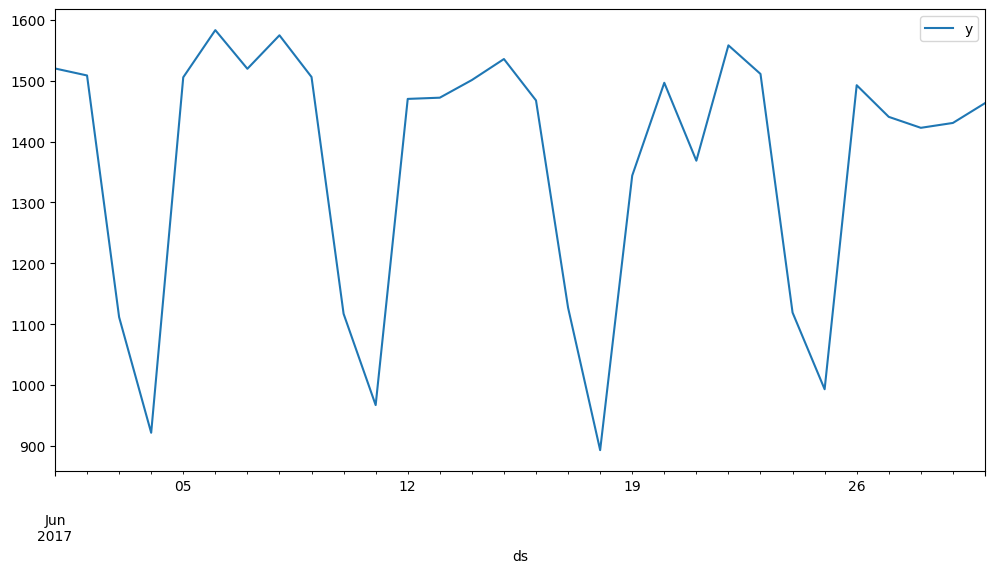

In [10]:
df.plot(x ='ds', y ='y', figsize =(12,6))

train_section=df.iloc[:21]
test_section=df.iloc[21:]

model = Prophet()
model.fit(train_section)
future_value = model.make_future_dataframe(periods=40)
forecast = model.predict(future_value)

In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2017-07-27,1168.845745,1007.966152,1316.419466
57,2017-07-28,1113.976104,949.516403,1271.970912
58,2017-07-29,732.952631,562.190349,895.096861
59,2017-07-30,536.096287,358.014251,703.653854
60,2017-07-31,1044.650014,861.790007,1213.597101


In [12]:
plot_plotly(model, forecast)

In [13]:
plot_components_plotly(model, forecast)

In [14]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

predictions = forecast.iloc[:9]['yhat']
test_data = test_section['y']

rmse_value = rmse(predictions, test_data)
mae_value = mean_absolute_error(predictions, test_data)

print("RMSE =", rmse_value)
print("MAE =", mae_value)
print("Mean =", test_data.mean())

RMSE = 70.16382162261041
MAE = 54.33204251697074
Mean = 1381.111111111111
